In [ ]:
pip install stable_baselines3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

Start Point: (0, 0)
End Point: (3, 3)


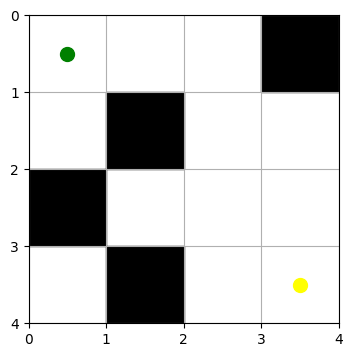

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np

class GridWorld:
    def __init__(self, width, height, obstacles, start, goal):
        self.width = width
        self.height = height
        self.obstacles = obstacles
        self.start = start
        self.goal = goal

        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.num_actions = len(self.actions)
        self.Q_values = torch.zeros((width, height, self.num_actions), dtype=torch.float32)

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 11
        elif (x, y) in self.obstacles:
            return -10
        else:
            return -0.5

    def plot_grid(self):
        plt.figure(figsize=(self.width, self.height))
        plt.xlim(0, self.width)
        plt.ylim(0, self.height)
        plt.xticks(range(self.width + 1))
        plt.yticks(range(self.height + 1))
        plt.grid(True)

        # Plot obstacles
        for obstacle in self.obstacles:
            plt.fill_between([obstacle[0], obstacle[0] + 1], obstacle[1], obstacle[1] + 1, color='black')

        # Plot start and goal points
        plt.plot(self.start[0] + 0.5, self.start[1] + 0.5, marker='o', color='green', markersize=10)
        plt.plot(self.goal[0] + 0.5, self.goal[1] + 0.5, marker='o', color='yellow', markersize=10)
        plt.gca().invert_yaxis()
        plt.show()

    def get_start(self):
        return self.start
    def get_end(self):
        return self.goal
    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height
    def get_next_state(self, x, y, action):
      dx, dy = self.actions[action]
      new_x, new_y = x + dx, y + dy
      if self.is_valid_location(new_x, new_y):
        return new_x, new_y
      else:
              return x, y
    def print_board(self):
      board = np.zeros((self.width, self.height), dtype=str)
      q_values = np.zeros((self.width, self.height, self.num_actions), dtype=float)
      for x in range(self.width):
          for y in range(self.height):
              if (x, y) == self.goal:
                  board[x, y] = 'G'
              elif (x, y) in self.obstacles:
                  board[x, y] = 'T'
              else:
                  for action in range(self.num_actions):
                      q_values[x, y, action] = self.Q_values[x, y, action]
                  board[x, y] = '.'
      print("Q-values:")
      print(q_values)
      print("Grid:")
      print(board)
    def q_learning(self, num_episodes, alpha, gamma, epsilon):
      for episode in range(num_episodes):
        x, y = self.start
        while (x, y) != self.goal:
            if np.random.uniform(0, 1) < epsilon:
                action = np.random.randint(self.num_actions)
            else:
                action = torch.argmax(self.Q_values[x, y]).item()
            next_x, next_y = self.get_next_state(x, y, action)
            reward = self.get_reward(next_x, next_y)
            next_action_value = torch.max(self.Q_values[next_x, next_y])
            self.Q_values[x, y, action] += alpha * (reward + gamma * next_action_value - self.Q_values[x, y, action])
            x, y = next_x, next_y
        print(f"Iteration {episode + 1}:")
        self.print_board()  # Assuming you have a method named print_board() to print the grid/board
        print("Q-values:")
        print(self.Q_values)  # Print Q-values for debugging

    def print_optimal_board(self):
      optimal_board = np.zeros((self.width, self.height), dtype=str)
      q_values_cpu = self.Q_values.cpu().numpy()
      for x in range(self.width):
          for y in range(self.height):
              if (x, y) == self.goal:
                  optimal_board[x, y] = 'G'
              elif (x, y) in self.obstacles:
                  optimal_board[x, y] = 'T'
              else:
                  optimal_action = np.argmax(q_values_cpu[x, y])
                  if optimal_action == 0:
                      optimal_board[x, y] = '→'
                  elif optimal_action == 1:
                      optimal_board[x, y] = '←'
                  elif optimal_action == 2:
                      optimal_board[x, y] = '↓'
                  elif optimal_action == 3:
                      optimal_board[x, y] = '↑'
      print("Optimal Board:")
      print(optimal_board)

# Example usage
width = 4
height = 4
obstacles = [(0, 2), (1, 3), (1, 1), (3, 0)]  # Example obstacle coordinates
start = (0, 0)  # Example start point
goal = (3, 3)   # Example goal point

grid = GridWorld(width, height, obstacles, start, goal)
print("Start Point:", grid.get_start())
print("End Point:", grid.get_end())
grid.plot_grid()


In [ ]:
num_episodes = 5
alpha = 0.1
gamma = 0.9
epsilon = 0.1
grid.q_learning(num_episodes, alpha, gamma, epsilon)

Iteration 1:
Q-values:
[[[-0.05       -0.05       -0.05        0.        ]
  [-1.         -0.05        0.          0.        ]
  [ 0.          0.          0.          0.        ]
  [-0.05       -1.          0.         -0.05      ]]

 [[-1.         -0.05       -0.05        0.        ]
  [ 0.          0.          0.          0.        ]
  [-1.         -1.          0.         -1.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.095       0.          0.          0.        ]
  [-0.05       -0.05       -0.05        0.        ]
  [-0.05       -0.05        0.          0.        ]
  [-0.05       -0.05        0.          0.        ]]

 [[ 0.          0.          0.          0.        ]
  [-0.05        0.          0.          0.        ]
  [ 1.10000002  0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]]]
Grid:
[['.' '.' 'T' '.']
 ['.' 'T' '.' 'T']
 ['.' '.' '.' '.']
 ['T' '.' '.' 'G']]
Q-values:
tensor([[[-0.0500, -0.0500, -0.0500,  0.0000

In [ ]:
grid.print_board()

Q-values:
[[[-0.40111545 -0.38627654 -0.42177853 -0.38627654]
  [-1.9000001  -0.39993963 -1.         -0.38627654]
  [ 0.          0.          0.          0.        ]
  [-0.05       -1.         -1.         -0.05      ]]

 [[-1.90450001 -0.29259926 -0.30199596 -0.32643411]
  [ 0.          0.          0.          0.        ]
  [-1.         -1.         -0.09059    -1.        ]
  [ 0.          0.          0.          0.        ]]

 [[-0.1805     -0.19701995 -1.90450001 -0.21989538]
  [-0.095      -0.10836545 -0.0995     -1.        ]
  [-0.05       -0.05        0.26238999 -0.05      ]
  [-0.05       -0.05        1.10000002  0.        ]]

 [[ 0.          0.          0.          0.        ]
  [ 0.0931     -1.         -0.05       -0.0545    ]
  [ 3.78289986  0.          0.          0.        ]
  [ 0.          0.          0.          0.        ]]]
Grid:
[['.' '.' 'T' '.']
 ['.' 'T' '.' 'T']
 ['.' '.' '.' '.']
 ['T' '.' '.' 'G']]


In [ ]:
grid.print_optimal_board()


Optimal Board:
[['←' '↑' 'T' '→']
 ['←' 'T' '↓' 'T']
 ['→' '→' '↓' '↓']
 ['T' '→' '→' 'G']]


In [ ]:
pip install shimmy

In [ ]:
import numpy as np
import gym
from stable_baselines3 import PPO

class GridWorld(gym.Env):
    def __init__(self, width, height, start, goal, traps):
        super(GridWorld, self).__init__()
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.traps = traps
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)
        self.observation_space = gym.spaces.Box(low=np.array([0, 0]), high=np.array([width, height]), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(self.num_actions)
        self.state = self.start
        self.iteration = 0


    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 100
        elif (x, y) in self.traps:
            return -100
        else:
            return -1

    def get_next_state(self, x, y, action):
      print(self.render())
      dx, dy = self.actions[action]
      new_x, new_y = x + dx, y + dy
      if self.is_valid_location(new_x, new_y):
        return new_x, new_y
      else:
        return x, y

    def reset(self):
        # Reset the environment to the start state
        self.state = self.start
        return np.array(self.state)

    def step(self, action):
        x, y = self.state
        next_x, next_y = self.get_next_state(x, y, action)
        reward = self.get_reward(next_x, next_y)
        done = (next_x, next_y) == self.goal
        self.state = (next_x, next_y)
        return np.array(self.state), reward, done, {}

    def render(self, mode='human'):
        # Render the environment (optional)
        grid = np.zeros((self.height, self.width), dtype=int)
        grid[self.goal[1]][self.goal[0]] = 2  # goal
        for trap in self.traps:
            grid[trap[1]][trap[0]] = -1  # traps
        grid[self.state[1]][self.state[0]] = 1  # agent
        print("Iteration:", self.iteration)
        print(grid)

# Create an instance of the GridWorld environment
width = 4
height = 4
traps = [(0, 2), (1, 3), (1, 1), (3, 0)]  # Example obstacle coordinates
start = (0, 0)  # Example start point
goal = (3, 3)
env = GridWorld(width, height, start, goal, traps)

# Create and train a PPO agent
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# Save the trained model
model.save("ppo_gridworld")

Streaming output truncated to the last 5000 lines.
[[ 1  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 1 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0  1  0  0]
 [-1  0  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  1  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0  1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0  1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0  1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  1  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0  1  0  2]]
None
Iteration: 0
[[ 0  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  1  2]]
None
Iteration: 0
[[ 1  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[[ 1  0  0 -1]
 [ 0 -1  0  0]
 [-1  0  0  0]
 [ 0 -1  0  2]]
None
Iteration: 0
[

In [ ]:
import numpy as np
import gym
from stable_baselines3 import PPO

class GridWorld(gym.Env):
    def __init__(self, width, height, start, goal, traps):
        super(GridWorld, self).__init__()
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.traps = traps
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # right, left, down, up
        self.num_actions = len(self.actions)
        self.observation_space = gym.spaces.Box(low=np.array([0, 0]), high=np.array([width, height]), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(self.num_actions)
        self.iteration = 0
        self.agents = 3
        self.reset()

    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.traps

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 100
        elif (x, y) in self.traps:
            return -100
        else:
            return -1

    def get_next_state(self, x, y, action):
        dx, dy = self.actions[action]
        new_x, new_y = x + dx, y + dy
        if self.is_valid_location(new_x, new_y):
            return new_x, new_y
        else:
            return x, y

    def reset(self):
        self.width = max(self.width, 4)  # Minimum width
        self.height = max(self.height, 4)  # Minimum height
        self.state = [self.start] * self.agents
        return np.array(self.state)

    def step(self, action):
       rewards = []
       dones = []
       for i, action in enumerate(actions):
          x, y = self.state[i]
          next_x, next_y = self.get_next_state(x, y, action)
          reward = self.get_reward(next_x, next_y)
          done = (next_x, next_y) == self.goal
          self.state[i] = (next_x, next_y)
          rewards.append(reward)
          dones.append(done)
       return np.array(self.state), np.array(reward), all(done), {}

    def render(self, mode='human'):
        grid = np.zeros((self.height, self.width), dtype=int)
        grid[self.goal[1]][self.goal[0]] = 2  # goal
        for trap in self.traps:
            grid[trap[1]][trap[0]] = -1  # traps
        for agent_pos in self.state:
            grid[self.state[1]][self.state[0]] = 1  # agent
        print("Iteration:", self.iteration)
        print(grid)

    def policy_evaluation(self, policy, discount_factor=0.9, theta=1e-6):
        V = np.zeros((self.width, self.height))
        while True:
            delta = 0
            for i in range(self.width):
                for j in range(self.height):
                    v = V[i, j]
                    action = policy[i, j]
                    x, y = i, j
                    next_x, next_y = self.get_next_state(x, y, action)
                    reward = self.get_reward(next_x, next_y)
                    V[i, j] = reward + discount_factor * V[next_x, next_y]
                    delta = max(delta, abs(v - V[i, j]))
            if delta < theta:
                break
        return V

    def policy_improvement(self, V, discount_factor=0.9):
        policy = np.zeros((self.width, self.height), dtype=int)
        for i in range(self.width):
            for j in range(self.height):
                max_value = -np.inf
                best_action = None
                for action in range(self.num_actions):
                    x, y = i, j
                    next_x, next_y = self.get_next_state(x, y, action)
                    reward = self.get_reward(next_x, next_y)
                    value = reward + discount_factor * V[next_x, next_y]
                    if value > max_value:
                        max_value = value
                        best_action = action
                policy[i, j] = best_action
        return policy

    def policy_iteration(self, discount_factor=0.9, theta=1e-6):
        policy = np.random.randint(0, self.num_actions, size=(self.width, self.height))
        while True:
            V = self.policy_evaluation(policy, discount_factor, theta)
            new_policy = self.policy_improvement(V, discount_factor)
            if np.array_equal(policy, new_policy):
                break
            policy = new_policy
        return policy

# Create an instance of the GridWorld environment
width, height = 4, 4
start = (0, 0)
goal = (4, 4)
traps = [(3, 4)]
env = GridWorld(width, height, start, goal, traps)

# Policy iteration
optimal_policy = env.policy_iteration()

# Display the optimal policy
print("Optimal Policy:")
print(optimal_policy)

Optimal Policy:
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


In [ ]:

import numpy as np
import gym
from stable_baselines3 import PPO

class GridWorld(gym.Env):
    def __init__(self, width, height, start, goal, traps):
        super(GridWorld, self).__init__()
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.traps = traps
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.num_actions = len(self.actions)
        self.observation_space = gym.spaces.Box(low=np.array([0, 0]), high=np.array([width, height]), dtype=np.float32)
        self.action_space = gym.spaces.Discrete(self.num_actions)
        self.iteration = 0
        self.agents = 3
        self.reset()

    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.traps

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 100
        elif (x, y) in self.traps:
            return -100
        else:
            return -1

    def get_next_state(self, x, y, action):
        dx, dy = self.actions[action]
        new_x, new_y = x + dx, y + dy
        if self.is_valid_location(new_x, new_y):
            return new_x, new_y
        else:
            return x, y

    def reset(self):
        self.width = max(self.width, 4)  # Minimum width
        self.height = max(self.height, 4)  # Minimum height
        self.state = [self.start] * self.agents
        return np.array(self.state)

    def step(self, actions):
        rewards = []
        dones = []
        for i, action in enumerate(actions):
            x, y = self.state[i]
            next_x, next_y = self.get_next_state(x, y, action)
            reward = self.get_reward(next_x, next_y)
            done = (next_x, next_y) == self.goal
            self.state[i] = (next_x, next_y)
            rewards.append(reward)
            dones.append(done)
        return np.array(self.state), np.array(rewards), all(dones), {}

    def render(self, mode='human'):
        grid = np.zeros((self.height, self.width), dtype=int)
        grid[self.goal[1]][self.goal[0]] = 2  # goal
        for trap in self.traps:
            grid[trap[1]][trap[0]] = -1  # traps
        for agent_pos in self.state:
            grid[agent_pos[1]][agent_pos[0]] = 1  # agent
        print("Iteration:", self.iteration)
        print(grid)

    def policy_evaluation(self, policy, discount_factor=0.9, theta=1e-6):
        V = np.zeros((self.width, self.height))
        while True:
            delta = 0
            for i in range(self.width):
                for j in range(self.height):
                    v = V[i, j]
                    action = policy[i, j]
                    x, y = i, j
                    next_x, next_y = self.get_next_state(x, y, action)
                    reward = self.get_reward(next_x, next_y)
                    V[i, j] = reward + discount_factor * V[next_x, next_y]
                    delta = max(delta, abs(v - V[i, j]))
            print(V)
            if delta < theta:
                break
        return V

    def policy_improvement(self, V, discount_factor=0.9):
        policy = np.zeros((self.width, self.height), dtype=int)
        for i in range(self.width):
            for j in range(self.height):
                max_value = -np.inf
                best_action = None
                for action in range(self.num_actions):
                    x, y = i, j
                    next_x, next_y = self.get_next_state(x, y, action)
                    reward = self.get_reward(next_x, next_y)
                    value = reward + discount_factor * V[next_x, next_y]
                    if value > max_value:
                        max_value = value
                        best_action = action
                policy[i, j] = best_action
        return policy

    def policy_iteration(self, discount_factor=0.9, theta=1e-6):
        policy = np.random.randint(0, self.num_actions, size=(self.width, self.height))
        while True:
            V = self.policy_evaluation(policy, discount_factor, theta)
            new_policy = self.policy_improvement(V, discount_factor)
            if np.array_equal(policy, new_policy):
                break
            policy = new_policy
        return policy

# Create an instance of the GridWorld environment
width, height = 4, 4  # Initial size
start = (0, 0)
goal = (width - 1, height - 1)
traps = [(1, 1), (2, 2)]  # Obstructed corners
env = GridWorld(width, height, start, goal, traps)

# Policy iteration
optimal_policy = env.policy_iteration()

# Display the optimal policy
print("Optimal Policy:")
print(optimal_policy)


[[ -1.   -1.   -1.   -1.9]
 [ -1.   -1.   -1.   -1. ]
 [ -1.9  -1.   -1.   -1.9]
 [ -1.   -1.9  -1.  100. ]]
[[ -1.9   -1.9   -1.9   -2.71]
 [ -1.9   -1.9   -1.9   -1.9 ]
 [ -2.71  -1.9   -2.71  -2.71]
 [ -1.9   -2.71  -1.9  190.  ]]
[[ -2.71   -2.71   -2.71   -3.439]
 [ -2.71   -2.71   -2.71   -2.71 ]
 [ -3.439  -2.71   -3.439  -3.439]
 [ -2.71   -3.439  -2.71  271.   ]]
[[ -3.439   -3.439   -3.439   -4.0951]
 [ -3.439   -3.439   -3.439   -3.439 ]
 [ -4.0951  -3.439   -4.0951  -4.0951]
 [ -3.439   -4.0951  -3.439  343.9   ]]
[[ -4.0951   -4.0951   -4.0951   -4.68559]
 [ -4.0951   -4.0951   -4.0951   -4.0951 ]
 [ -4.68559  -4.0951   -4.68559  -4.68559]
 [ -4.0951   -4.68559  -4.0951  409.51   ]]
[[ -4.68559   -4.68559   -4.68559   -5.217031]
 [ -4.68559   -4.68559   -4.68559   -4.68559 ]
 [ -5.217031  -4.68559   -5.217031  -5.217031]
 [ -4.68559   -5.217031  -4.68559  468.559   ]]
[[ -5.217031   -5.217031   -5.217031   -5.6953279]
 [ -5.217031   -5.217031   -5.217031   -5.217031 ]
 [ -

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, width, height, start, goal, obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.num_actions = len(self.actions)
        self.Q_values = np.zeros((width, height, self.num_actions), dtype=float)

    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 11
        elif (x, y) in self.obstacles:
            return -10
        else:
            return -0.5

    def get_next_state(self, x, y, action):
        dx, dy = self.actions[action]
        new_x, new_y = x + dx, y + dy
        if self.is_valid_location(new_x, new_y):
            return new_x, new_y
        else:
            return x, y

    def q_learning(self, num_episodes, alpha, gamma, epsilon, convergence_threshold=1e-6):
      iteration_count = 0
      while True:
        max_q_change = 0  # Track the maximum change in Q-values for convergence
        for episode in range(num_episodes):
          x, y = self.start
          while (x, y) != self.goal:
            if np.random.uniform(0, 1) < epsilon:
              action = np.random.randint(self.num_actions)
            else:
              action = np.argmax(self.Q_values[x, y])
              next_x, next_y = self.get_next_state(x, y, action)
              reward = self.get_reward(next_x, next_y)
              next_action_value = np.max(self.Q_values[next_x, next_y])
              q_old = self.Q_values[x, y, action]  # Old Q-value
              self.Q_values[x, y, action] += alpha * (reward + gamma * next_action_value - self.Q_values[x, y, action])
              q_change = abs(self.Q_values[x, y, action] - q_old)  # Change in Q-value
              max_q_change = max(max_q_change, q_change)
              x, y = next_x, next_y
        iteration_count += 1
        print(f"Iteration {iteration_count}, Max Q-value change: {max_q_change}")
        if max_q_change < convergence_threshold:
          print("Converged.")
          break


    def evaluate_policy(self, num_episodes=100):
        returns = []
        for _ in range(num_episodes):
            x, y = self.start
            total_reward = 0
            while (x, y) != self.goal:
                action = np.argmax(self.Q_values[x, y])
                next_x, next_y = self.get_next_state(x, y, action)
                total_reward += self.get_reward(next_x, next_y)
                x, y = next_x, next_y
            returns.append(total_reward)
        average_return = np.mean(returns)
        return average_return

# Example usage
width = 4
height = 4
start = (0, 0)
goal = (3, 3)
obstacles = [(0, 2), (1, 3), (1, 1), (3, 0)]

grid = GridWorld(width, height, start, goal, obstacles)

# Run Q-learning for policy improvement
num_episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 0.1

grid.q_learning(num_episodes, alpha, gamma, epsilon)

# Evaluate the learned policy
average_return = grid.evaluate_policy()
print("Average return achieved by the learned policy:", average_return)


Iteration 1, Max Q-value change: 1.1
Iteration 2, Max Q-value change: 0
Converged.
Average return achieved by the learned policy: 8.5


In [ ]:
def bellman_expectation(self, state, action, V, gamma):
    next_states = [(self.get_next_state(*state, action), self.get_reward(*self.get_next_state(*state, action))) for action in range(self.num_actions)]
    value = sum(prob * (reward + gamma * V[next_state]) for next_state, reward in next_states)
    return value

def policy_evaluation(self, policy, discount_factor=0.9, theta=1e-6):
    V = np.zeros((self.width, self.height))
    while True:
        delta = 0
        for i in range(self.width):
            for j in range(self.height):
                v = V[i, j]
                action = policy[i, j]
                V[i, j] = self.bellman_expectation((i, j), action, V, discount_factor)
                delta = max(delta, abs(v - V[i, j]))
        if delta < theta:
            break
    return V


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class GridWorld:
    def __init__(self, width, height, start, goal, obstacles):
        self.width = width
        self.height = height
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        self.num_actions = len(self.actions)
        self.Q_values = np.zeros((width, height, self.num_actions), dtype=float)

    def is_valid_location(self, x, y):
        return 0 <= x < self.width and 0 <= y < self.height and (x, y) not in self.obstacles

    def get_reward(self, x, y):
        if (x, y) == self.goal:
            return 11
        elif (x, y) in self.obstacles:
            return -10
        else:
            return -0.5

    def get_next_state(self, x, y, action):
        dx, dy = self.actions[action]
        new_x, new_y = x + dx, y + dy
        if self.is_valid_location(new_x, new_y):
            return new_x, new_y
        else:
            return x, y

    def q_learning(self, num_episodes, alpha, gamma, epsilon, convergence_threshold=1e-6):
      iteration_count = 0
      while True:
        max_q_change = 0  # Track the maximum change in Q-values for convergence
        for episode in range(num_episodes):
          x, y = self.start
          while (x, y) != self.goal:
            if np.random.uniform(0, 1) < epsilon:
              action = np.random.randint(self.num_actions)
            else:
              action = np.argmax(self.Q_values[x, y])
              next_x, next_y = self.get_next_state(x, y, action)
              reward = self.get_reward(next_x, next_y)
              next_action_value = np.max(self.Q_values[next_x, next_y])
              q_old = self.Q_values[x, y, action]  # Old Q-value
              self.Q_values[x, y, action] += alpha * (reward + gamma * next_action_value - self.Q_values[x, y, action])
              q_change = abs(self.Q_values[x, y, action] - q_old)  # Change in Q-value
              max_q_change = max(max_q_change, q_change)
              x, y = next_x, next_y
        iteration_count += 1
        print(f"Iteration {iteration_count}, Max Q-value change: {max_q_change}")
        if max_q_change < convergence_threshold:
          print("Converged.")
          break
    def bellman_expectation(self, state, action, V, gamma):
      next_states = [(self.get_next_state(*state, action), self.get_reward(*self.get_next_state(*state, action))) for action in range(self.num_actions)]
      value = sum(prob * (reward + gamma * V[next_state]) for next_state, reward in next_states)
      return value

    # def evaluate_policy(self, num_episodes=100):
    #     returns = []
    #     for _ in range(num_episodes):
    #         x, y = self.start
    #         total_reward = 0
    #         while (x, y) != self.goal:
    #             action = np.argmax(self.Q_values[x, y])
    #             next_x, next_y = self.get_next_state(x, y, action)
    #             total_reward += self.get_reward(next_x, next_y)
    #             x, y = next_x, next_y
    #         returns.append(total_reward)
    #     average_return = np.mean(returns)
    #     return average_return
    def policy_evaluation(self, policy, discount_factor=0.9, theta=1e-6):
      V = np.zeros((self.width, self.height))
      while True:
        delta = 0
        for i in range(self.width):
          for j in range(self.height):
            v = V[i, j]
            action = policy[i, j]
            V[i, j] = self.bellman_expectation((i, j), action, V, discount_factor)
            delta = max(delta, abs(v - V[i, j]))
        if delta < theta:
          break
      return V


# Example usage
width = 4
height = 4
start = (0, 0)
goal = (3, 3)
obstacles = [(0, 2), (1, 3), (1, 1), (3, 0)]

grid = GridWorld(width, height, start, goal, obstacles)

# Run Q-learning for policy improvement
num_episodes = 1000
alpha = 0.1
gamma = 0.9
epsilon = 0.1

grid.q_learning(num_episodes, alpha, gamma, epsilon)

# Evaluate the learned policy
average_return = grid.policy_evaluation()
print("Average return achieved by the learned policy:", average_return)


In [ ]:
def compute_action_probability_sum(policy, state):
    """
    Computes the sum of action probabilities in a given state under the policy.
    """
    return np.sum(policy[state[0], state[1]])
